# Tasca M7 T01

Classification Algorithm Exercises

## Exercise 1 and Exercise 3

*Create at least two different classification models to try to better predict the classes in the attachment.*
*Train them using the different parameters they support in order to improve their prediction.*

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
col_names = ['class', 'alcohol','malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 
             'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline' ]
# load dataset
df = pd.read_csv("wineData.txt", sep=",",  header=None, names=col_names)

In [4]:
df.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity of ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  proli

In [5]:
#split dataset in features and target variable
feature_cols = ['alcohol','malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 
             'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']
X = df[feature_cols] # Features
y = df['class'] # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object

#Optimizing Decision Tree Performance (Exercise 3)
#https://www.datacamp.com/tutorial/decision-tree-classification-python#:~:text=it%20by%20pruning.-,
    #Optimizing%20Decision%20Tree%20Performance,depth%20causes%20overfitting%2C%20and%20a%20lower%20value%20causes%20underfitting%20(Source).,-In%20Scikit%2Dlearn
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = clf.predict(X_test)

## Exercise 2 and Exercise 4

*Compare classification models using accuracy, a confusion matrix and other more advanced metrics.*
*Compare its performance using the traint/test or cross-validation approach.*

In [17]:
# Model Accuracy
print("Decision Tree Classification Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

Decision Tree Classification Accuracy: 0.9629629629629629


In [18]:
#The classification report gives us accuracy, precision, recall, and f1-score
# Adding classes names for better interpretation
target_names = ['Class 1', 'Class 2', 'Class 3']
print(metrics.classification_report(y_test, y_pred_dtc, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.96      0.96      0.96        23
     Class 2       0.95      0.95      0.95        19
     Class 3       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



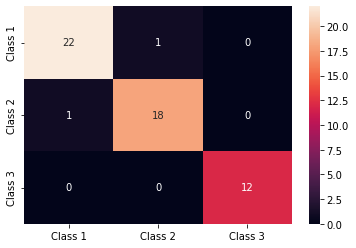

In [19]:
# First argument is true values, second argument is predicted values
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_dtc), 
                  columns=target_names, index = target_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

* Class 1 had 1 extra value that was Class 2, and 1 that was classified as Class 2
* Class 2 had 1 extra value that was a Class 1
* Class 3 was classified correctly

## Exercise 5

*Apply some engineering process to improve the results (normalization, standardization, sampling...)* <br />
In this case Scaling was used (Normalization)

### Classification using K-Nearest Neighbors

In [8]:
#Feature Scaling for Classification
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Training and Predicting for Classification
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
#Same as metrics.accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Classification Accuracy:", classifier.score(X_test, y_test))

K-Nearest Neighbors Classification Accuracy: 0.9814814814814815


In [12]:
# Adding classes names for better interpretation
target_names = ['Class 1', 'Class 2', 'Class 3']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.96      1.00      0.98        23
     Class 2       1.00      0.95      0.97        19
     Class 3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



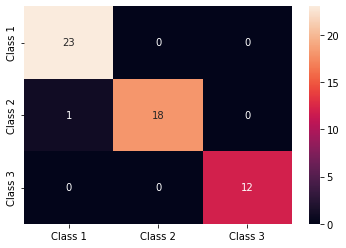

In [15]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
                  columns=target_names, index = target_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

* Class 1 was mostly correct, except for 1 that was classified as Class 2
* Class 2 had 1 extra that was a Class 1
* Class 3 was classified correctly

In [31]:
#Finding the Best K for KNN Classification
#calculate its value for all the predictions of a K-Nearest Neighbors classifier, where K ranges from 1 to 20
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

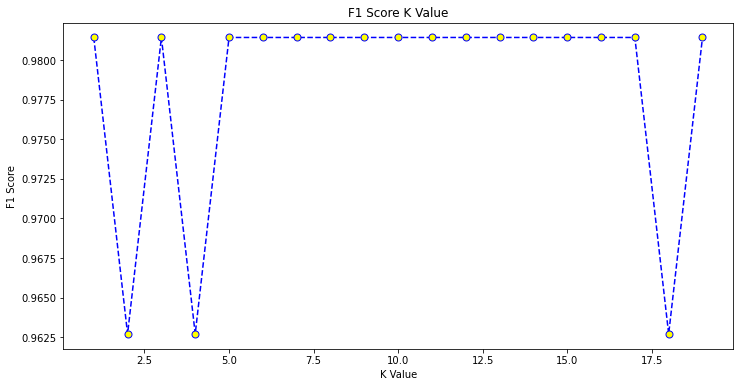

In [32]:
#Plot the f1_score values against K values. Choose the value that maximizes the f1-score.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), f1s, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=7)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

We see that the 5 neighboor baseline its enough, as F1 score is 100% or close. No need to change the classifier